In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as sklm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.datasets import load_iris
from patsy import dmatrices

# 1. Regression

In [10]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [31]:
df = pd.DataFrame(iris.data, columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'])
#df

### 1.1 Variable Generation
    - Dependent variable : Petal Length
    - Independent variable: Petal Width, Sepal Length, Sepal Width.

In [60]:
x = df[['Petal_Width','Sepal_Length','Sepal_Width']]
y = df['Petal_Length']

### 1.2 Regression using Scikit-Learn

In [179]:
LR_model = sklm.LinearRegression()
LR_model.fit(x,y)
print('Coefficients are ' + str(LR_model.coef_))
print('Intercept is ' + str(LR_model.intercept_))
print('Score is ' + str(LR_model.score(x,y)))

Coefficients are [ 1.44679341  0.72913845 -0.64601244]
Intercept is -0.26271119757418093
Score is 0.9680117693912218


In [225]:
LR_model = sklm.LinearRegression()
LR_model.fit(df[['Petal_Length','Petal_Width','Sepal_Width']],
             df['Sepal_Length'])
print('Coefficients are ' + str(LR_model.coef_))
print('Intercept is ' + str(LR_model.intercept_))
print('Score is ' + str(LR_model.score(x,y)))

Coefficients are [ 0.70913196 -0.55648266  0.65083716]
Intercept is 1.8559974929175405
Score is -1.7628710805507377


### 1.3 Regression using Statmodels1

In [41]:
df = pd.DataFrame(iris.data, columns = ['Sepal_Length','Sepal_Width',
                                        'Petal_Length','Petal_Width'])
brr = smf.ols("Petal_Length ~ Petal_Width + Sepal_Length + Sepal_Width", 
              data = df).fit()
print(brr.summary())

                            OLS Regression Results                            
Dep. Variable:           Petal_Length   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1473.
Date:                Tue, 28 Sep 2021   Prob (F-statistic):          6.98e-109
Time:                        20:00:19   Log-Likelihood:                -39.408
No. Observations:                 150   AIC:                             86.82
Df Residuals:                     146   BIC:                             98.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.2627      0.297     -0.883   

In [43]:
df = pd.DataFrame(iris.data, columns = ['Sepal Length','Sepal_Width',
                                        'Petal_Length','Petal_Width'])
brr = smf.ols("Petal_Length ~ Petal_Width + Sepal Length + Sepal_Width", 
              data = df).fit()
print(brr.summary())

SyntaxError: invalid syntax (<unknown>, line 1)

### 1.4 Regression using Statmodels2

In [66]:
xn = sm.add_constant(x)
b_model1 = sm.OLS(y, xn)
brr1=b_model1.fit()
print(brr1.summary())

                            OLS Regression Results                            
Dep. Variable:           Petal_Length   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1473.
Date:                Mon, 20 Sep 2021   Prob (F-statistic):          6.98e-109
Time:                        22:14:35   Log-Likelihood:                -39.408
No. Observations:                 150   AIC:                             86.82
Df Residuals:                     146   BIC:                             98.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2627      0.297     -0.883   

### 1.5 Regression using Direct Calculation

In [70]:
X = xn.to_numpy()
Y = y.to_numpy()
betas = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
print(betas)

[-0.2627112   1.44679341  0.72913845 -0.64601244]


### 1.6 Regression Visualization

In [70]:
X = xn.to_numpy()
Y = y.to_numpy()
betas = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
print(betas)

[-0.2627112   1.44679341  0.72913845 -0.64601244]


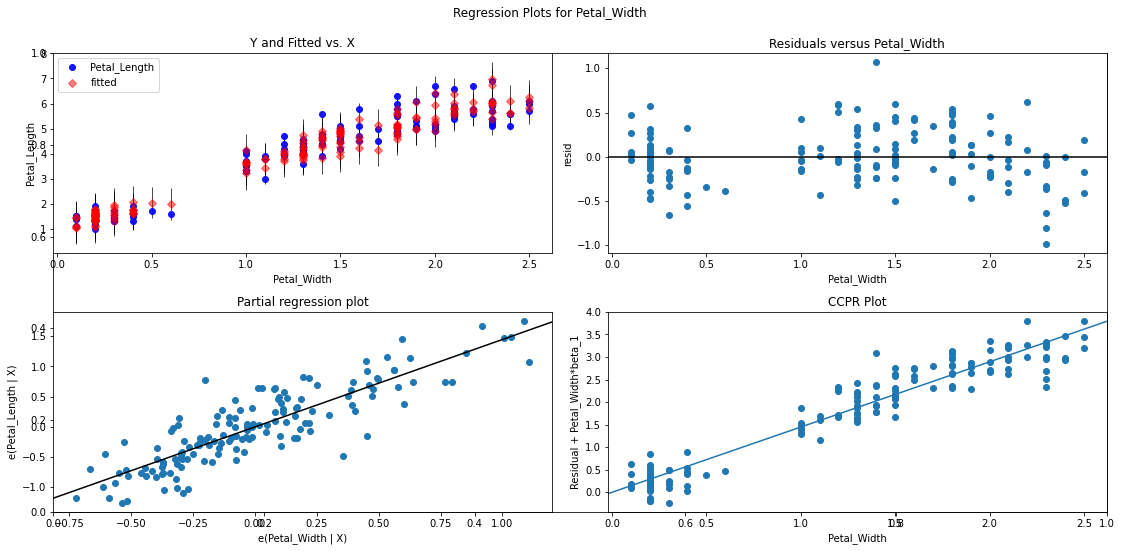

In [181]:
fig, ax = plt.subplots(figsize = (16,8))
sm.graphics.plot_regress_exog(brr,'Petal_Width', fig = fig)
plt.show()

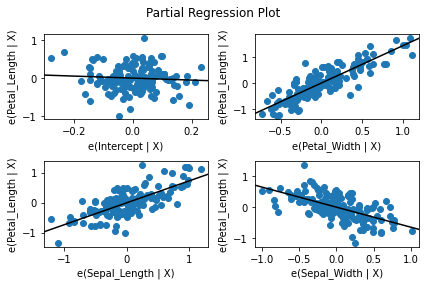

In [224]:
fig = sm.graphics.plot_partregress_grid(brr)
fig.tight_layout(pad=1.0)

# 2. Clustering

In [226]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

### 2.1. Number of Clusters Optimization using Elbow Method

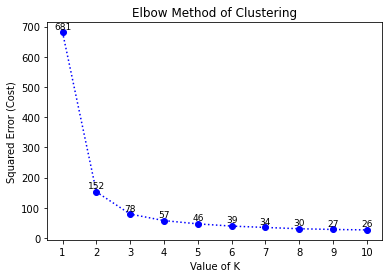

In [243]:
cost = []
for i in range(1,11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(df)
    cost.append(KM.inertia_)

plt.plot(range(1,11),cost,'o', color = 'b', linestyle = ':')

y = list(map(int,cost))
for i, v in enumerate(range(1,11)):
    plt.text(v, y[i]+5, y[i],
             fontsize = 9, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.title('Elbow Method of Clustering')
plt.xticks(range(1,11))
plt.xlabel('Value of K')
plt.ylabel('Squared Error (Cost)')
plt.show()

### 2.3. Clustering using Optimal Value

In [187]:
kmeans = KMeans(n_clusters = 3).fit(df)
centers = kmeans.cluster_centers_
print(kmeans.cluster_centers_)
labels = kmeans.labels_
print(kmeans.labels_)
print(kmeans.inertia_)

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
78.851441426146


In [245]:
dic_color = {0:'violet',1:'c',2:'y'}
color_code = []
for item in labels:
    color_code.append(dic_color[item])

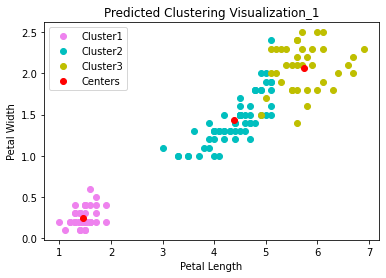

In [275]:
cluster1x = []
cluster1y = []
cluster2x = []
cluster2y = []
cluster3x = []
cluster3y = []
for i in range(df.shape[0]):
    if color_code[i] == 'violet':
        cluster1x.append(df['Petal_Length'][i])
        cluster1y.append(df['Petal_Width'][i])
    elif color_code[i] == 'c':
        cluster2x.append(df['Petal_Length'][i])
        cluster2y.append(df['Petal_Width'][i])
    elif color_code[i] == 'y':
        cluster3x.append(df['Petal_Length'][i])
        cluster3y.append(df['Petal_Width'][i])
plt.plot(cluster1x, cluster1y,'o',color='violet')
plt.plot(cluster2x, cluster2y,'o',color='c')
plt.plot(cluster3x, cluster3y,'o',color='y')


petal_center_x = []
petal_center_y = []
for item in centers:
    petal_center_x.append(item[2])
    petal_center_y.append(item[3])
plt.plot(petal_center_x,petal_center_y,'o',color='r')

plt.legend(['Cluster1','Cluster2','Cluster3','Centers'])
plt.title('Predicted Clustering Visualization_1')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

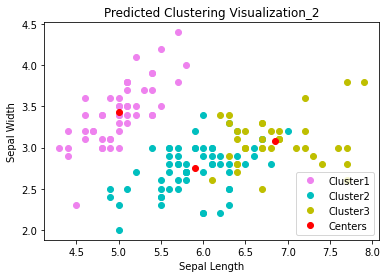

In [276]:
cluster1x = []
cluster1y = []
cluster2x = []
cluster2y = []
cluster3x = []
cluster3y = []
for i in range(df.shape[0]):
    if color_code[i] == 'violet':
        cluster1x.append(df['Sepal_Length'][i])
        cluster1y.append(df['Sepal_Width'][i])
    elif color_code[i] == 'c':
        cluster2x.append(df['Sepal_Length'][i])
        cluster2y.append(df['Sepal_Width'][i])
    elif color_code[i] == 'y':
        cluster3x.append(df['Sepal_Length'][i])
        cluster3y.append(df['Sepal_Width'][i])
plt.plot(cluster1x, cluster1y,'o',color='violet')
plt.plot(cluster2x, cluster2y,'o',color='c')
plt.plot(cluster3x, cluster3y,'o',color='y')


petal_center_x = []
petal_center_y = []
for item in centers:
    petal_center_x.append(item[0])
    petal_center_y.append(item[1])
plt.plot(petal_center_x,petal_center_y,'o',color='r')

plt.legend(['Cluster1','Cluster2','Cluster3','Centers'])
plt.title('Predicted Clustering Visualization_2')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [278]:
dic = {1:0,2:1,0:2}
comparison = []
for i in range(len(labels)):
    if not labels[i] == iris.target[i]:
        comparison.append(4)
    else:
        comparison.append(iris.target[i])
dic_color = {0:'violet',1:'c',2:'y', 4:'black'}
color_code = []
for item in comparison:
    color_code.append(dic_color[item])

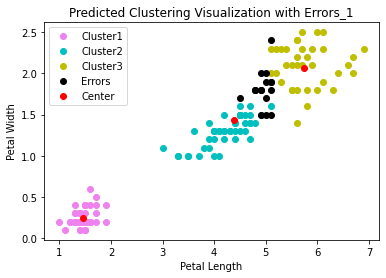

In [285]:
cluster1x = []
cluster1y = []
cluster2x = []
cluster2y = []
cluster3x = []
cluster3y = []
cluster4x = []
cluster4y = []
for i in range(df.shape[0]):
    if color_code[i] == 'violet':
        cluster1x.append(df['Petal_Length'][i])
        cluster1y.append(df['Petal_Width'][i])
    elif color_code[i] == 'c':
        cluster2x.append(df['Petal_Length'][i])
        cluster2y.append(df['Petal_Width'][i])
    elif color_code[i] == 'y':
        cluster3x.append(df['Petal_Length'][i])
        cluster3y.append(df['Petal_Width'][i])
    elif color_code[i] == 'black':
        cluster4x.append(df['Petal_Length'][i])
        cluster4y.append(df['Petal_Width'][i])
    
plt.plot(cluster1x, cluster1y,'o',color='violet')
plt.plot(cluster2x, cluster2y,'o',color='c')
plt.plot(cluster3x, cluster3y,'o',color='y')
plt.plot(cluster4x, cluster4y,'o',color='black')

petal_center_x = []
petal_center_y = []
for item in centers:
    petal_center_x.append(item[2])
    petal_center_y.append(item[3])
plt.plot(petal_center_x,petal_center_y,'o',color='r')

plt.legend(['Cluster1','Cluster2','Cluster3','Errors','Center'])
plt.title('Predicted Clustering Visualization with Errors_1')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


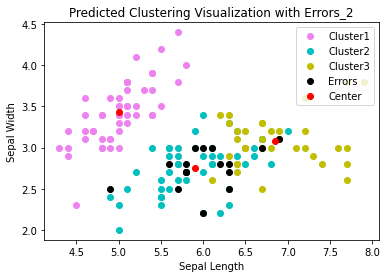

In [286]:
cluster1x = []
cluster1y = []
cluster2x = []
cluster2y = []
cluster3x = []
cluster3y = []
cluster4x = []
cluster4y = []
for i in range(df.shape[0]):
    if color_code[i] == 'violet':
        cluster1x.append(df['Sepal_Length'][i])
        cluster1y.append(df['Sepal_Width'][i])
    elif color_code[i] == 'c':
        cluster2x.append(df['Sepal_Length'][i])
        cluster2y.append(df['Sepal_Width'][i])
    elif color_code[i] == 'y':
        cluster3x.append(df['Sepal_Length'][i])
        cluster3y.append(df['Sepal_Width'][i])
    elif color_code[i] == 'black':
        cluster4x.append(df['Sepal_Length'][i])
        cluster4y.append(df['Sepal_Width'][i])
plt.plot(cluster1x, cluster1y,'o',color='violet')
plt.plot(cluster2x, cluster2y,'o',color='c')
plt.plot(cluster3x, cluster3y,'o',color='y')
plt.plot(cluster4x, cluster4y,'o',color='black')

petal_center_x = []
petal_center_y = []
for item in centers:
    petal_center_x.append(item[0])
    petal_center_y.append(item[1])
plt.plot(petal_center_x,petal_center_y,'o',color='r')

plt.legend(['Cluster1','Cluster2','Cluster3','Errors','Center'])
plt.title('Predicted Clustering Visualization with Errors_2')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [287]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [288]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [291]:
a = 0
for item in comparison:
    if item == 4 :
        a +=1
print(a)

16
